# Lab 2: Ch 3, Problem 8 and 9.

### Problem 8

Let's add the data! (Remove any rows with incomplete data).

In [1]:
Auto = read.table("Auto.data", header=T, na.strings="?")
dim(Auto)
Auto = na.omit(Auto)
dim(Auto)

[1] 397   9

[1] 392   9

To create a linear model, using mpg as the *response* and horsepower as the *predictor*.

In [2]:
lm.fit = lm(mpg~horsepower, data=Auto)
lm.fit


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Coefficients:
(Intercept)   horsepower  
    39.9359      -0.1578  


Based on our model, we can see that our model takes on the form:

$$\text {mpg} = 39.9359 + (-0.1578) * \text{horsepower}$$

In [3]:
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


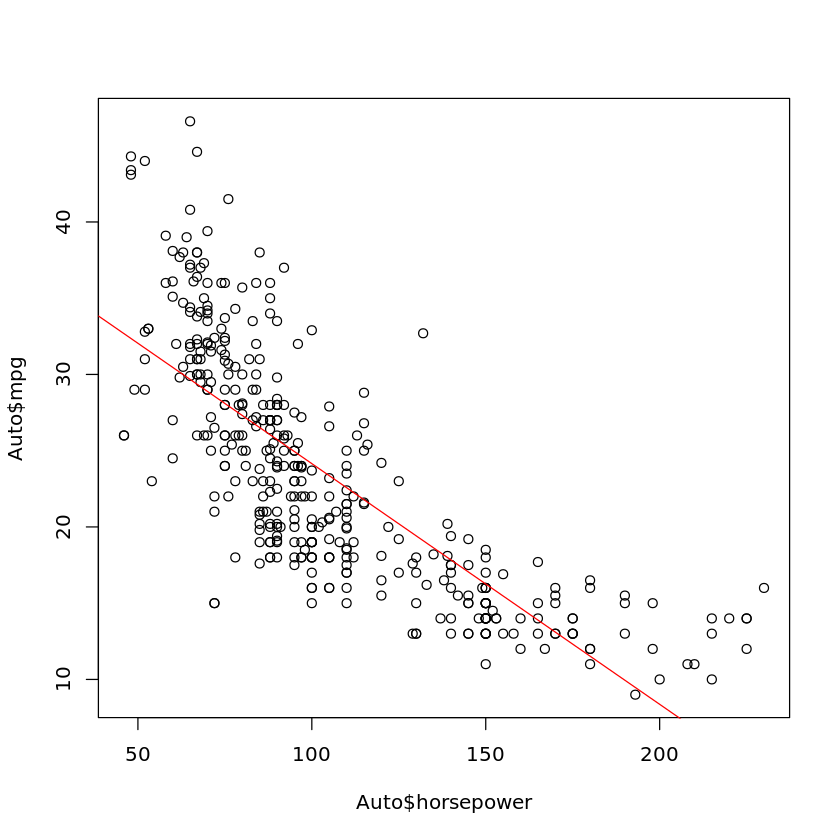

In [4]:
plot( Auto$horsepower,Auto$mpg)
X = seq(0, 300, length = 100)
Y = 39.935861 + X * -0.157845 # Using the coefficients from the summary of lm.fit
lines(X, Y, type='l',col='red')

In [5]:
confint(lm.fit)
4.906/mean(Auto$mpg)

,2.5 %,97.5 %
(Intercept),38.525212,41.3465103
horsepower,-0.170517,-0.1451725


[1] 0.2092475

3ai.) Yes! There is a relationship between the predictor, horsepower, and the response, mpg.

3aii.) The residual standard error is 4.906, which is pretty good, considering the mean of mpg (20.9% error).

3aiii.) The relationship between horsepower and mpg are negative (the slope is negative).

In [6]:
predict(lm.fit, data.frame(horsepower=c(98)), interval="confidence")

,fit,lwr,upr
1,24.46708,23.97308,24.96108


3aiv.) The predicted mpg associated with horsepower is 24.46708mpg. After looking at the plot, it seems to make sense. We are 95% confident that the true value is in between \[23.97308, 24.96108\]

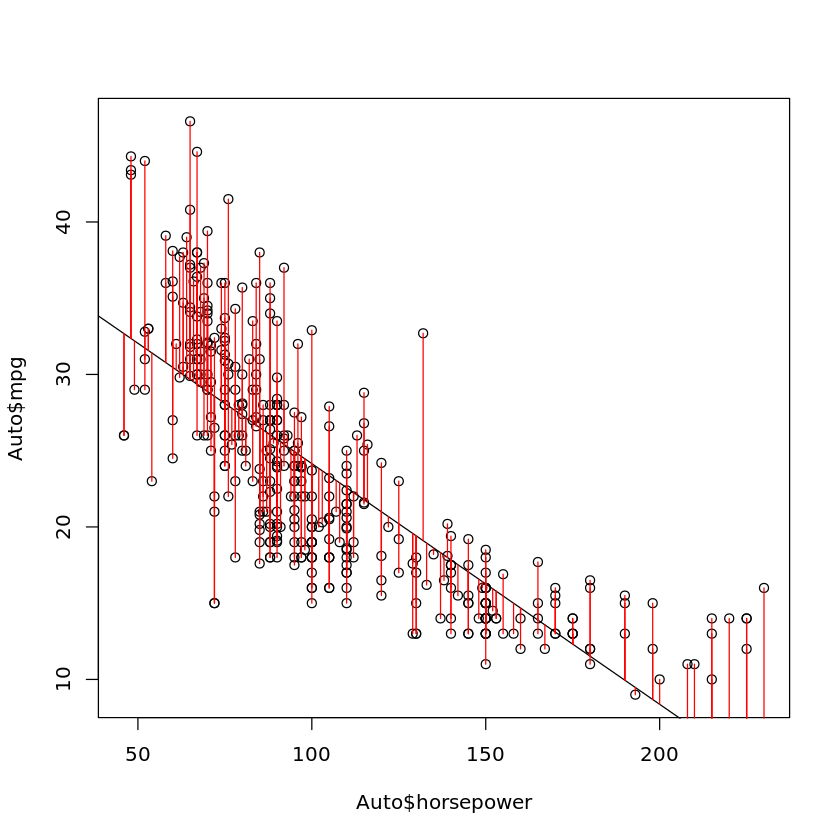

In [7]:
plot( Auto$horsepower,Auto$mpg)
predMpg = predict(lm.fit)
abline(lm.fit)
segments(Auto$horsepower, Auto$mpg, Auto$horsepower, predMpg, col="red")
#8b:

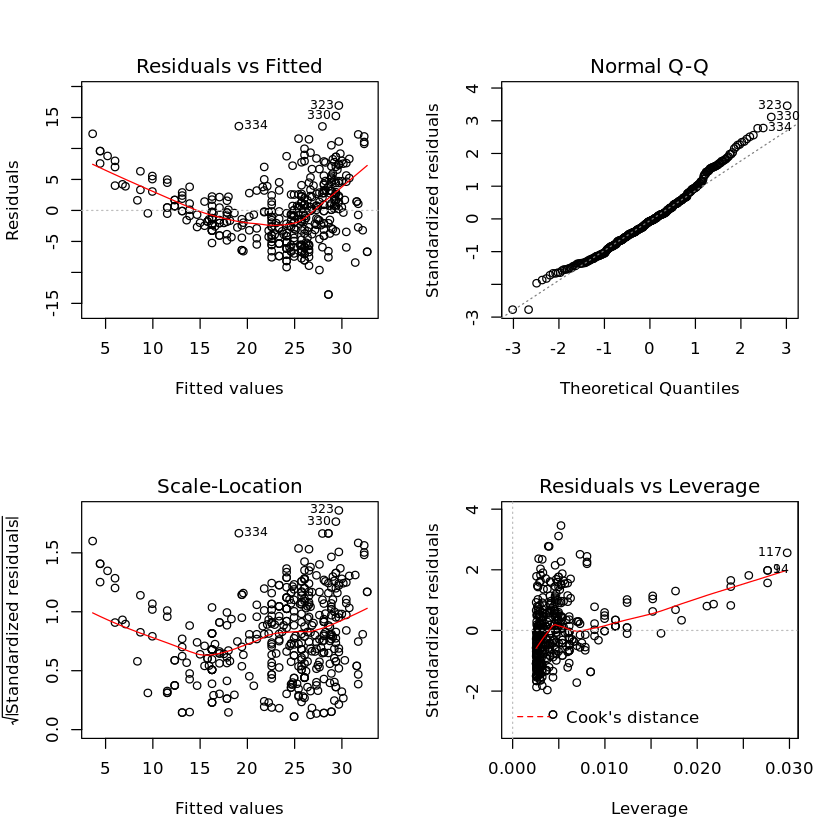

In [8]:
par(mfrow=c(2,2))
plot(lm.fit)

8c.)There is little pattern in the residual graph, meaning the data is probably non-linear (there are more features that contribute to mpg than just horsepower itself.)

### Problem 9

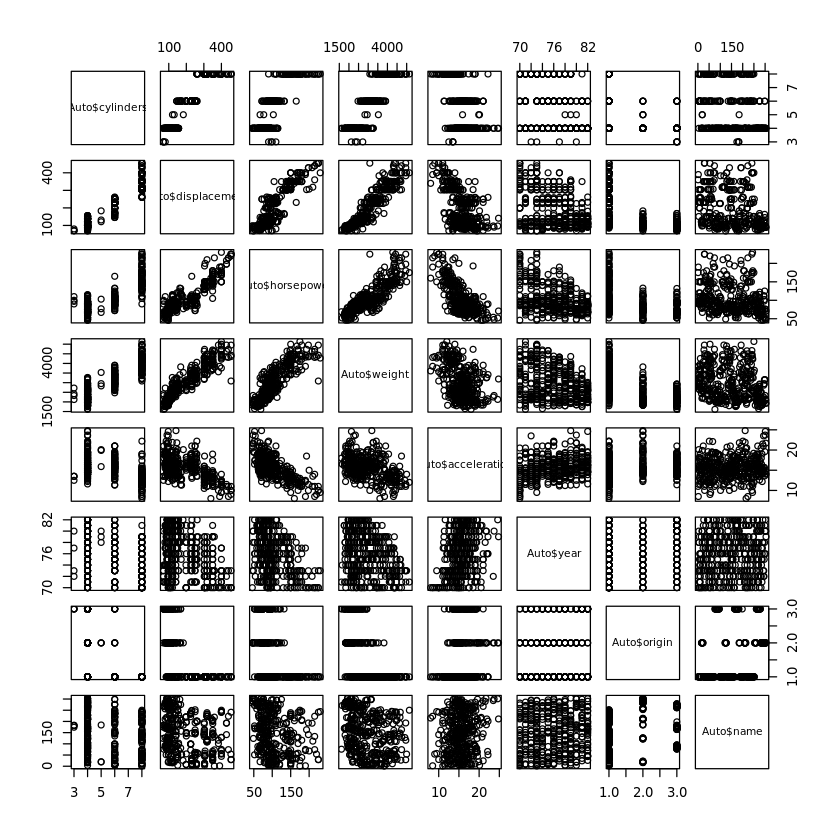

In [9]:
# 9a
pairs(~Auto$cylinders+Auto$displacement+Auto$horsepower+Auto$weight+Auto$acceleration+Auto$year+Auto$origin+Auto$name)

This is a scatter plot matrix between each of the variables, so that we can see which variables correlate to each other. The top and bottom part of the diagonal essentially tell the same information, so looking at more than half of the matrix will just give you a headache.

In [10]:
#9b
tmp=Auto[-c(9)]
cor(tmp)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


The above tells us how correlated each variable is with each other. Again, only half of the matrix is necessary.

Next, let's create a multilinear model of mpg, using every variable. This should look like:
$$\text{mpg} \approx \beta_0 + \beta_1 \times \text{cylinders} + \beta_2 \times \text{displacement} + \beta_3 \times \text{horsepower}...$$

In [11]:
multLinModel = lm(Auto$mpg~Auto$cylinders+Auto$displacement+Auto$horsepower+Auto$weight+Auto$acceleration+Auto$year+Auto$origin)
multLinModel


Call:
lm(formula = Auto$mpg ~ Auto$cylinders + Auto$displacement + 
    Auto$horsepower + Auto$weight + Auto$acceleration + Auto$year + 
    Auto$origin)

Coefficients:
      (Intercept)     Auto$cylinders  Auto$displacement    Auto$horsepower  
       -17.218435          -0.493376           0.019896          -0.016951  
      Auto$weight  Auto$acceleration          Auto$year        Auto$origin  
        -0.006474           0.080576           0.750773           1.426140  


In [12]:
summary(multLinModel)


Call:
lm(formula = Auto$mpg ~ Auto$cylinders + Auto$displacement + 
    Auto$horsepower + Auto$weight + Auto$acceleration + Auto$year + 
    Auto$origin)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -17.218435   4.644294  -3.707  0.00024 ***
Auto$cylinders     -0.493376   0.323282  -1.526  0.12780    
Auto$displacement   0.019896   0.007515   2.647  0.00844 ** 
Auto$horsepower    -0.016951   0.013787  -1.230  0.21963    
Auto$weight        -0.006474   0.000652  -9.929  < 2e-16 ***
Auto$acceleration   0.080576   0.098845   0.815  0.41548    
Auto$year           0.750773   0.050973  14.729  < 2e-16 ***
Auto$origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-st

i.) Yes! We built a multi-linear model to try and predict mpg, based on all of the variables in the data set.

ii.) The model seems to suggest that displacement, weight, year, and origin have the most significant relationship to mpg, since they have the smallest p-values.

iii.) Year has the coefficient of .750773, which is a relatively large magnitude. The model suggests that the year of the car has a large effect on what the mpg is.

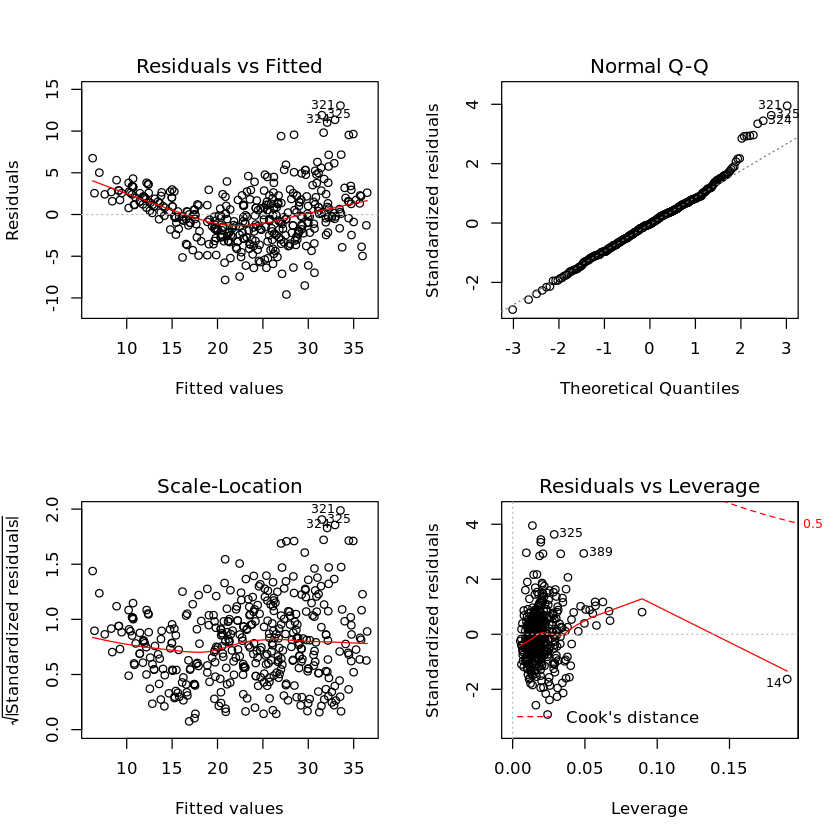

In [13]:
par(mfrow=c(2,2))
plot(multLinModel)

d.) The U-shaped plot on the Residual v Fitted graph suggests that the data should be non-linear. There is a small cluster of outliers that are between \[10,15\] in the residual graph--indices 321, 324, 325.

In [14]:
transformedMultLinModel = lm(Auto$mpg~Auto$cylinders:Auto$displacement*Auto$horsepower:Auto$weight+Auto$acceleration:Auto$year+Auto$origin)

In [15]:
summary(transformedMultLinModel)


Call:
lm(formula = Auto$mpg ~ Auto$cylinders:Auto$displacement * Auto$horsepower:Auto$weight + 
    Auto$acceleration:Auto$year + Auto$origin)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.327  -2.363  -0.208   1.719  14.891 

Coefficients:
                                                               Estimate
(Intercept)                                                   3.366e+01
Auto$origin                                                   1.073e+00
Auto$cylinders:Auto$displacement                             -5.145e-03
Auto$horsepower:Auto$weight                                  -5.361e-05
Auto$acceleration:Auto$year                                   3.259e-03
Auto$cylinders:Auto$displacement:Auto$horsepower:Auto$weight  1.404e-08
                                                             Std. Error t value
(Intercept)                                                   1.915e+00  17.581
Auto$origin                                                   3.123e-01   3.436
Aut

9e.) To be completely honest, I have no idea what I just did, but now I have 2+ stars on all my coefficients, so I'm happy. I'd love to discuss what this actually means in your office hours tomorrow.

In [16]:
transformedMultLinModel2 = lm(Auto$mpg~log(I(Auto$cylinders)^1/2)+Auto$displacement*Auto$displacement+Auto$horsepower+I(Auto$weight^2)+log(Auto$acceleration)+Auto$year+Auto$origin*Auto$origin)

In [17]:
summary(transformedMultLinModel2)


Call:
lm(formula = Auto$mpg ~ log(I(Auto$cylinders)^1/2) + Auto$displacement * 
    Auto$displacement + Auto$horsepower + I(Auto$weight^2) + 
    log(Auto$acceleration) + Auto$year + Auto$origin * Auto$origin)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1712  -2.2678  -0.2416   2.0000  13.4901 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -8.699e+00  7.151e+00  -1.216 0.224589    
log(I(Auto$cylinders)^1/2) -5.361e+00  1.825e+00  -2.938 0.003500 ** 
Auto$displacement           1.160e-02  8.116e-03   1.429 0.153783    
Auto$horsepower            -5.582e-02  1.508e-02  -3.701 0.000246 ***
I(Auto$weight^2)           -5.196e-07  1.062e-07  -4.894 1.46e-06 ***
log(Auto$acceleration)     -3.637e+00  1.712e+00  -2.124 0.034269 *  
Auto$year                   6.993e-01  5.394e-02  12.963  < 2e-16 ***
Auto$origin                 1.673e+00  2.950e-01   5.672 2.78e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

9f.) Similar to 9e. I was able to decrease the p-value of cylinders by logging the root and by squaring the weight. I also logged the acceleration, which then increased the p-value of displacement. Still not too sure what's happening behind the scenes here though.